# Crawler

## Import Packages

In [1]:
!pip install -U tqdm

     |████████████████████████████████| 81kB 7.3MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [2]:
from typing import List

import pandas as pd
import requests
from lxml import etree
from tqdm.notebook import tqdm

## Main Function

In [3]:
class Crawler:
    def __init__(self) -> None:
        # 發布日期
        self.dates: List[str] = []
        # 資料來源
        self.sources: List[str] = []
        # 新聞網址
        self.urls: List[str] = []
        # 新聞標題
        self.titles: List[str] = []
        # 新聞內容
        self.contents: List[str] = []
        
        self.df = None

    def start(self) -> None:
        total = 758
        for i in tqdm(range(1, total), desc="Fetching articles"):
            self.get_news_title(page=i)
        self.df = pd.DataFrame(
            {
                "date": self.dates,
                "source": self.sources,
                "url": self.urls,
                "title": self.titles,
                "content": self.contents,
            }
        )
        self.df.to_csv("data.csv")

    def get_news_title(self, page: int) -> None:
        url = "https://www.fsc.gov.tw/ch/home.jsp?id=2&parentpath=0&mcustomize="
        payload = {
            "id": 2,
            "contentid": 96,
            "parentpath": 0,
            "mcustomize": "news_list.jsp",
            "qunit": "",
            "dateid": "",
            "qptdate": "",
            "qdldate": "",
            "keyword": "請輸入查詢關鍵字",
            "page": page,
            "pagesize": "",
        }
        response = requests.post(url=url, data=payload)
        root = etree.HTML(response.content)
        dates = root.xpath('//*[@class="pdate1"]')
        sources = root.xpath('//*[@class="souse1"]')
        titles = root.xpath('//*[@class="ptitle1"]/a')
        for i in range(len(dates)):
            date = dates[i].text
            source = sources[i].text
            title = titles[i]
            url = title.get("href")
            title = title.text
            content = self.get_news_content(url=url)

            # Append to record
            self.dates.append(date)
            self.sources.append(source)
            self.urls.append(url)
            self.titles.append(title)

            self.contents.append(content)

    def get_news_content(self, url) -> str:
        url = "https://www.fsc.gov.tw/ch/" + url
        response = requests.get(url=url)
        root = etree.HTML(response.content)
        content = root.xpath('//*[@id="maincontent"]/div[2]/div[2]//text()')
        content = "".join(c for c in content)
        return content


In [4]:
crawler = Crawler()
crawler.start()
crawler.df

Fetching articles:   0%|          | 0/758 [00:00<?, ?it/s]

,Unnamed: 0,date,source,url,title,content
0,0,2021-06-17,金融監督管理委員會,home.jsp?id=2&parentpath=0&mcustomize=news_vie...,金融監督管理委員會證券期貨局每日新聞（110年6月17日）,\n\n壹、公開發行公司等動態\n一、預計110年6月18日生效:\n二、停止公開發行案.\...
1,1,2021-06-17,銀行局,home.jsp?id=2&parentpath=0&mcustomize=news_vie...,金管會核准韓商韓亞銀行(KEB Hana Bank)設立在臺分行,\n\n 金管會核准韓商韓亞銀行(KEB Hana Bank)設立在臺分行申請案，...
2,2,2021-06-17,保險局,home.jsp?id=2&parentpath=0&mcustomize=news_vie...,金管會提醒保戶，聯絡方式如有異動，請記得即時通知保險公司，以維護保單權益,\n\n 金融監督管理委員會（下稱金管會）提醒保戶，留存於保險公司之地址、聯絡電話...
3,3,2021-06-16,證券期貨局,home.jsp?id=2&parentpath=0&mcustomize=news_vie...,金融監督管理委員會證券期貨局每日新聞（110年6月16日）,\n\n壹、公開發行公司等動態\n一、預計110年6月17日生效:\n二、停止公開發行案.\...
4,4,2021-06-15,證券期貨局,home.jsp?id=2&parentpath=0&mcustomize=news_vie...,金融監督管理委員會證券期貨局每日新聞（110年6月15日）,\n\n壹、公開發行公司等動態\n一、預計110年6月16日生效:\n二、停止公開發行案.\...
...,...,...,...,...,...,...
11345,11345,1997-09-08,保險局,home.jsp?id=2&parentpath=0&mcustomize=news_vie...,保險局核准我國第一張年金保險「遞延終身年金保險」,財政部保險局新聞稿 八十六年九月八日\r\n\r\n一、為因應高齡化社會之來臨，...
11346,11346,1997-09-04,保險局,home.jsp?id=2&parentpath=0&mcustomize=news_vie...,保險局核准「綁架勒贖綜合保險」,保險局新聞稿 86年9月4日\r\n\r\n一、近年來由於國內綁架勒贖之犯罪...
11347,11347,1997-08-25,保險局,home.jsp?id=2&parentpath=0&mcustomize=news_vie...,強制汽車責任保險法推動進度,強制汽車責任保險法推動進度新聞稿\r\n\r\n財政部為推動強制汽車責任保險法之施行...
11348,11348,1997-08-19,保險局,home.jsp?id=2&parentpath=0&mcustomize=news_vie...,溫妮颱風過境產物保險理賠情況,溫妮颱風過境，帶來豪雨，造成全省重大人員傷亡\r\n與財物損失，中央與地方均積極動員傾力救難...


# Word Cloud

## Import Packages

In [5]:
!pip install -U ckip-transformers

In [6]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
from ckip_transformers.nlp import (CkipNerChunker, CkipPosTagger,
                                   CkipWordSegmenter)
from PIL import Image
from wordcloud import ImageColorGenerator, WordCloud

# Initialize driver
ws_driver = CkipWordSegmenter(device=0)

## Stop words

In [7]:
with open("stop_words.txt", "r", encoding="utf8") as f:  
    stop_words = f.read().split("\n") 

## Main function

In [8]:
def generate_word_cloud(file_name: str, column:str, save_name:str = ""):
    # Calculate term's frequency
    df = pd.read_csv(file_name)
    df = df.dropna(subset=[column])

    content = ""
    for article in df[column]:
        article = article.strip("")
        article = article.strip("\n")
        content += article
    print(f"內容長度：{len(content)} 字")
    print(f"=========================")
    terms = [term for term in ws_driver([content])[0] if term not in stop_words]
    
    # Generate Word Cloud
    font = r'TaipeiSansTCBeta-Regular.ttf'
    wordcloud = WordCloud(background_color="white", font_path=font, collocations=False, width=2400, height=2400, margin=2)  
    wordcloud.generate_from_frequencies(frequencies=Counter(terms))

    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    
    plt.show()
    
    if save_name != "":
        wordcloud.to_file(f"{save_name}.png")

## Result

### 金融監督管理委員會 - 標題

Tokenization:   0%|          | 0/1 [00:00<?, ?it/s]

內容長度：300267 字


Inference: 100%|██████████| 3/3 [00:05<00:00,  1.92s/it]


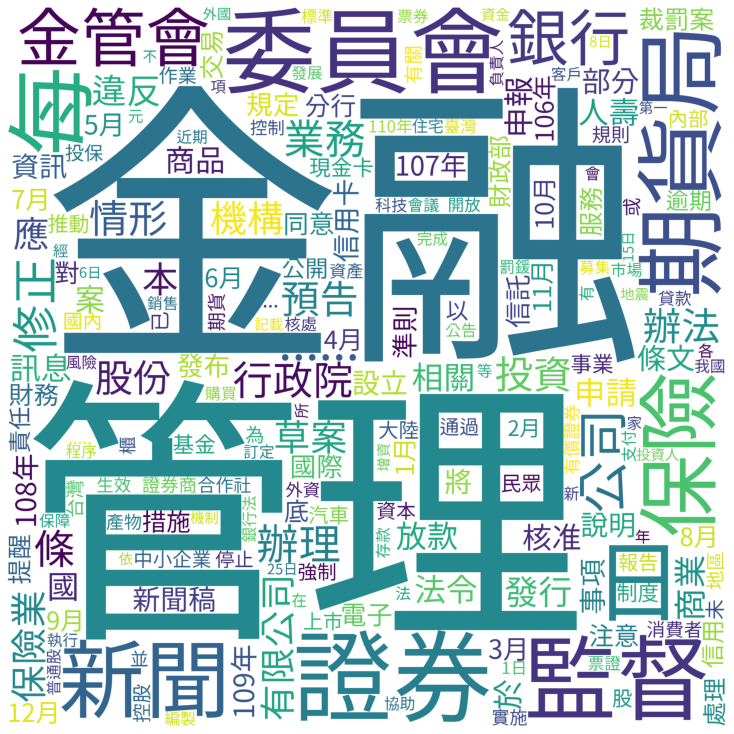

In [9]:
generate_word_cloud(file_name="data.csv", column="title", save_name="金管會-標題")

### 金融監督管理委員會 - 內文

Tokenization:   0%|          | 0/1 [00:00<?, ?it/s]

內容長度：7524104 字


Inference: 100%|██████████| 58/58 [02:25<00:00,  2.51s/it]


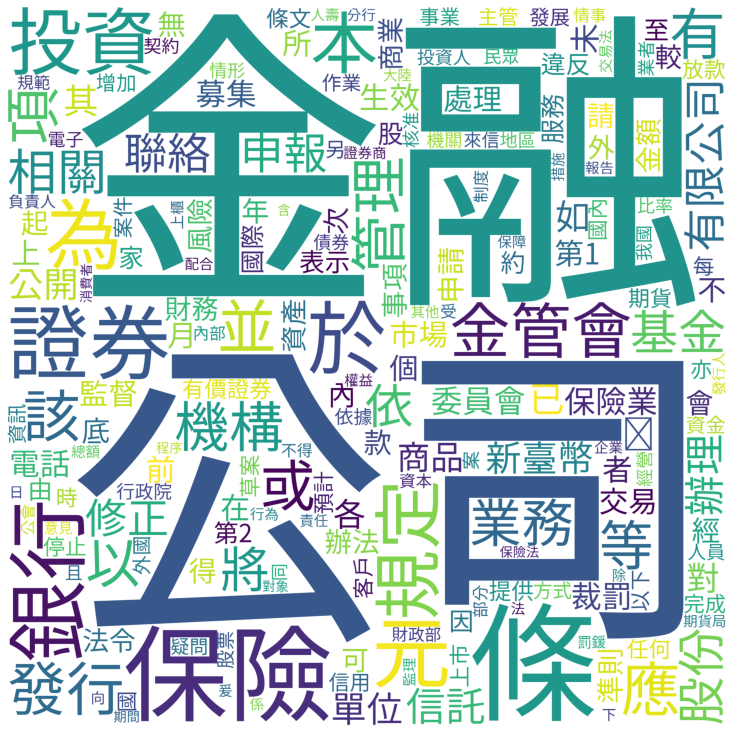

In [10]:
generate_word_cloud(file_name="data.csv", column="content", save_name="金管會-內文")

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

內容長度：50631 字


Inference: 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]


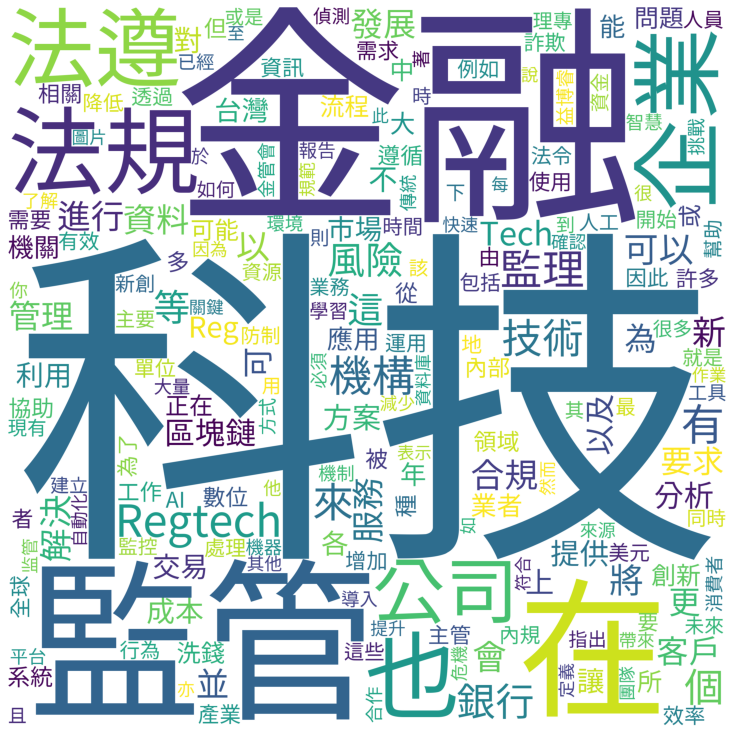

In [11]:
generate_word_cloud(file_name="RegTech.csv", column="content", save_name="RegTech")